In [1]:
import networkx as nx
import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network
from network_generate import network_gen_chain, network_gen_ring, network_gen_powlaw_tree

import libgillespie

# Demonstration of base network topologies

In [2]:
TIME_POINTS = np.linspace(0, 10, 1001)
repl = 1000

SOMA_CB = 0.1
SOMA_BR = 0.1
SOMA_NSS = 250
DELTA = 0.5
TURNOVER = 2.0
GAMMA_ANT = 1.5
GAMMA_RET = 0

bio_param = {'soma_cb':SOMA_CB, 'soma_br':SOMA_BR, 'soma_nss':SOMA_NSS, 'delta':DELTA, 'turnover':TURNOVER, 'gamma_ant':GAMMA_ANT, 'gamma_ret':GAMMA_RET}

## Chain system

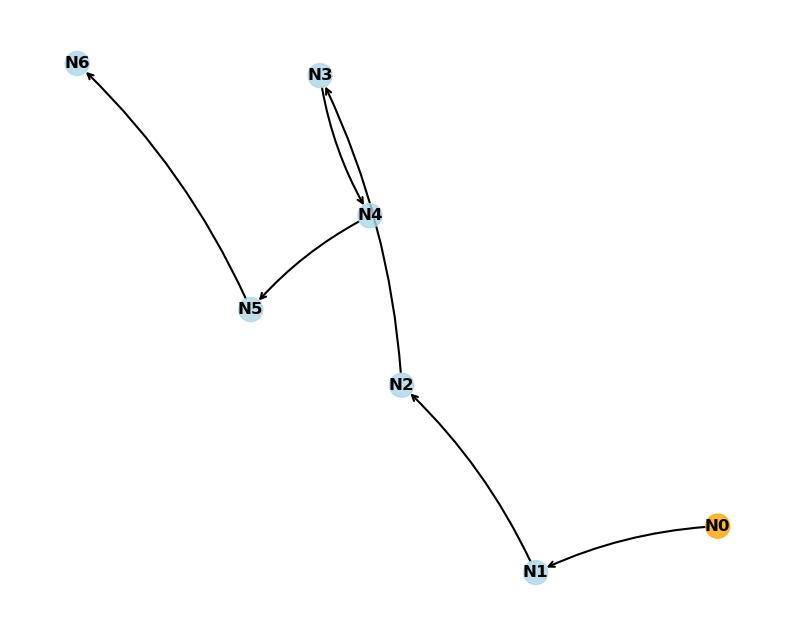

> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5))),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5))),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(1.5)))+(N0_wt*1.5),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(1.5)))+(N0_mt*1.5),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(1.5)))+(N1_wt*1.5),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(1.5)))+(N1_mt*1.5),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(1.5)))+(N2_wt*1.5),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(1.5)))+(N2_mt*1.5),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(1.5)))+(N3_wt*1.5),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(1.5)))+(N3_mt*1.5),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(1.5)))+(N4_wt*1.5),
		# ΔN5_mt/Δt
		(N5_mt*(0-(2.0)-(1.5)))+(N4_mt*1.5),
		# ΔN6_wt/Δt
		(N6_wt*(0-(2.0)-(0.0)))+(N5_wt*1.5),
		# ΔN6_mt/Δt
		(N6_mt*(0-(2.0)-(0.0)))+(N5_mt*1.5),
		]


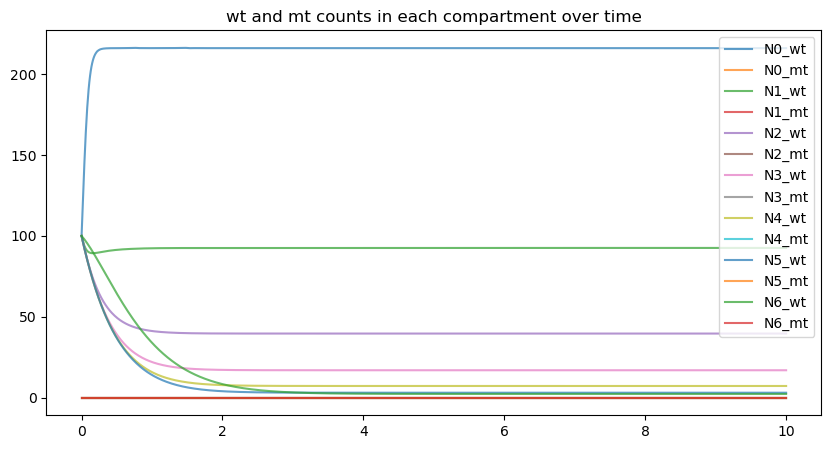

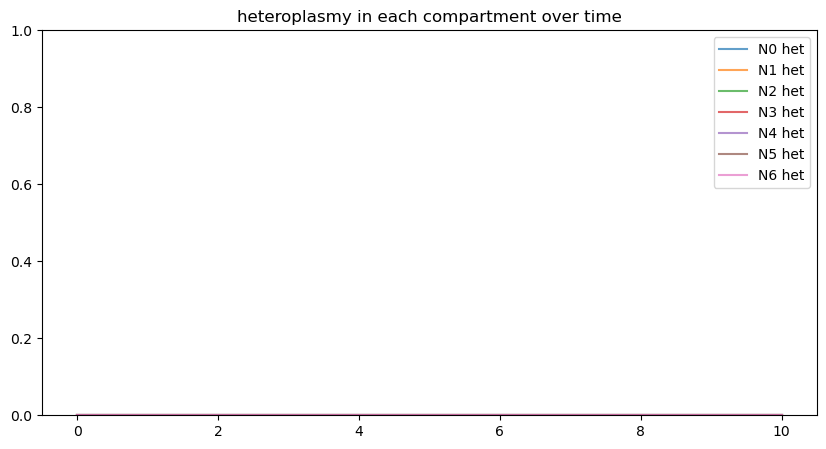

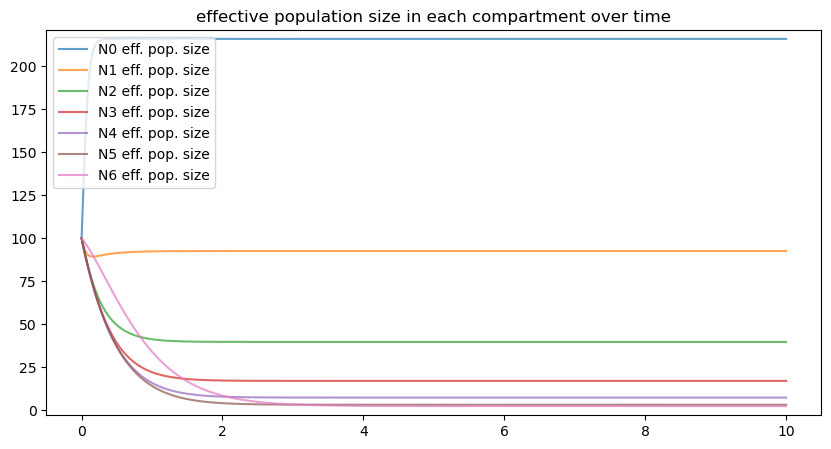

> Final counts of mt and wt in each compartment:
N0_wt	216.0	
N0_mt	0.0	
N1_wt	92.5714	
N1_mt	0.0	
N2_wt	39.6735	
N2_mt	0.0	
N3_wt	17.0029	
N3_mt	0.0	
N4_wt	7.287	
N4_mt	0.0	
N5_wt	3.123	
N5_mt	0.0	
N6_wt	2.3419	
N6_mt	0.0	

> Final effective population sizes in each compartment:
N0	216.0	
N1	92.5714	
N2	39.6735	
N3	17.0029	
N4	7.287	
N5	3.123	
N6	2.3419	
> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
9	7	death	2.0	[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
10	8	death

/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:94: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


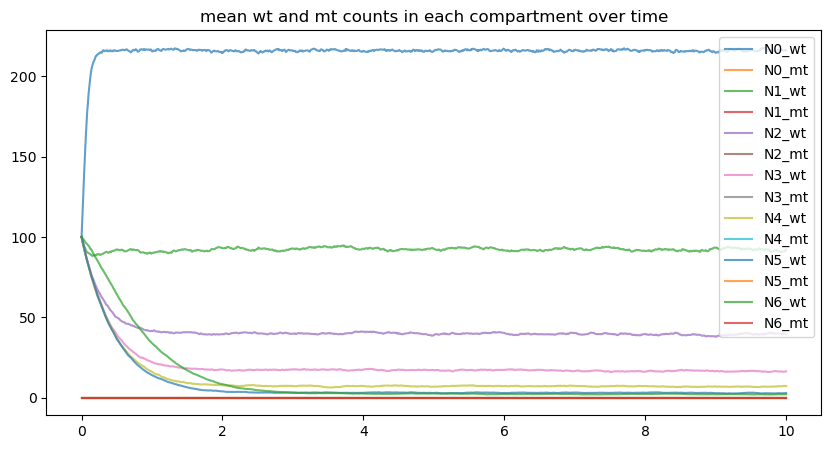

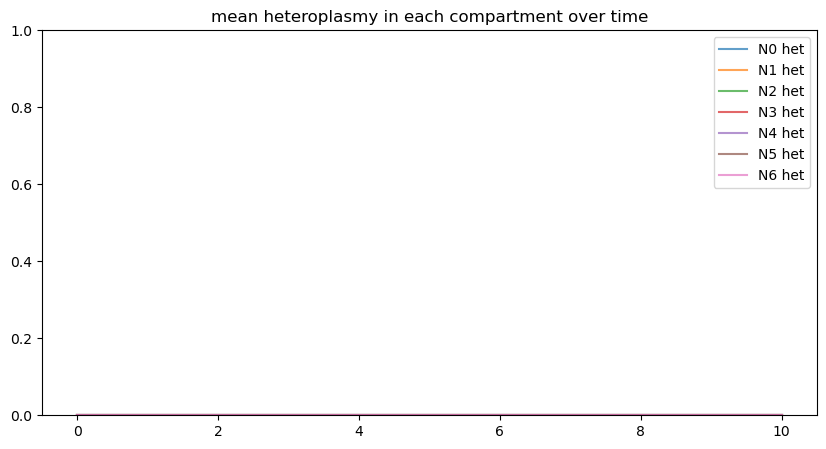

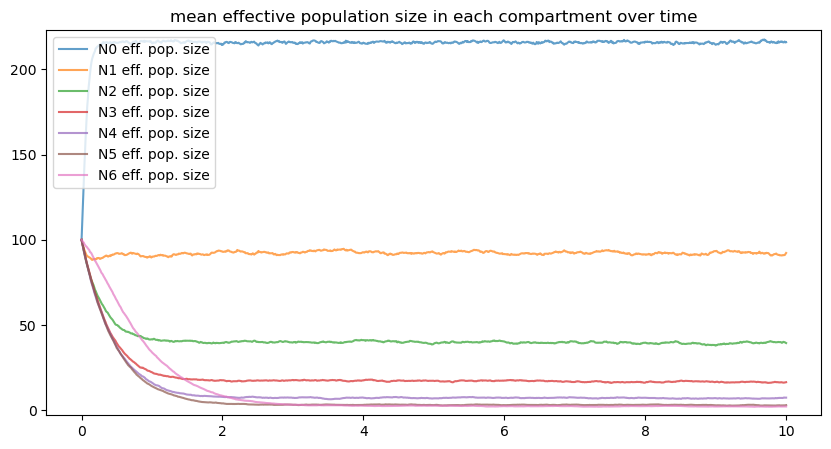

> Final mean counts of mt and wt in each compartment:
N0_wt	216.0	
N0_mt	0.0	
N1_wt	92.26	
N1_mt	0.0	
N2_wt	39.4	
N2_mt	0.0	
N3_wt	16.42	
N3_mt	0.0	
N4_wt	7.35	
N4_mt	0.0	
N5_wt	2.95	
N5_mt	0.0	
N6_wt	2.15	
N6_mt	0.0	

> Final mean heteroplasmy in each compartment:
N0	0.0	
N1	0.0	
N2	0.0	
N3	0.0	
N4	0.0	
N5	0.0	
N6	0.0	

> Final mean effective population sizes in each compartment:
N0	216.0	
N1	92.26	
N2	39.4	
N3	16.42	
N4	7.35	
N5	2.95	
N6	2.15	

> Change in mean heteroplasmy: 
start: 0.0
final: 0.0
delta: 0.0


In [3]:
C_G, C_VARS, C_COMP, C_START_STATE = network_gen_chain(7, [100,0] ,bio_param)
plot_network(C_G)

C_ODE_model = ODE_from_network(C_G)
plot_ODE(ODE_simulate(C_ODE_model, TIME_POINTS, C_START_STATE), TIME_POINTS, DELTA, C_VARS, C_COMP)

C_GILL_PARAM = gillespie_param_from_network(C_G)
plot_gillespie(GILL_simulate(C_GILL_PARAM, TIME_POINTS, C_START_STATE, repl), TIME_POINTS, DELTA, C_VARS, C_COMP)

## Ring system

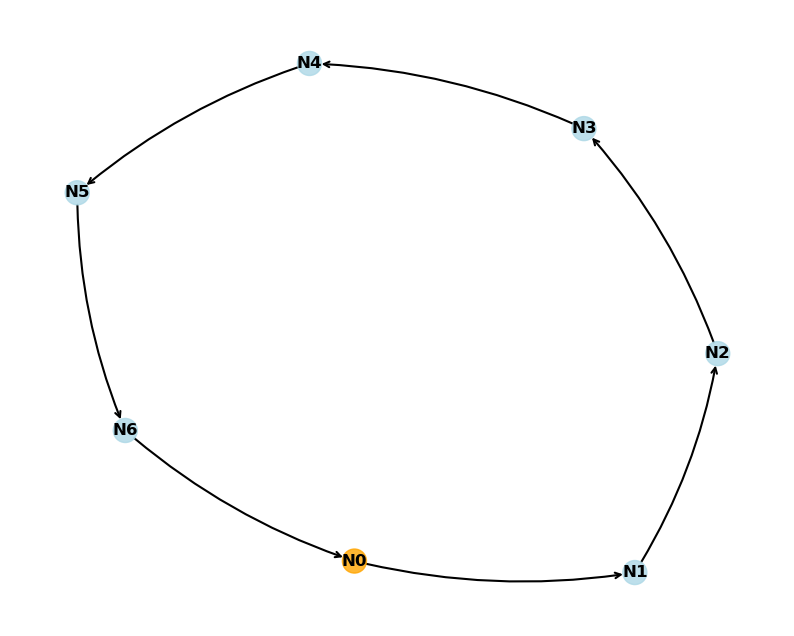

> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N6_wt*1.5),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N6_mt*1.5),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(1.5)))+(N0_wt*1.5),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(1.5)))+(N0_mt*1.5),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(1.5)))+(N1_wt*1.5),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(1.5)))+(N1_mt*1.5),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(1.5)))+(N2_wt*1.5),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(1.5)))+(N2_mt*1.5),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(1.5)))+(N3_wt*1.5),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(1.5)))+(N3_mt*1.5),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(1.5)))+(N4_wt*1.5),
		# ΔN5_mt/Δt
		(N5_mt*(0-(2.0)-(1.5)))+(N4_mt*1.5),
		# ΔN6_wt/Δt
		(N6_wt*(0-(2.0)-(1.5)))+(N5_wt*1.5),
		# ΔN6_mt/Δt
		(N6_mt*(0-(2.0)-(1.5)

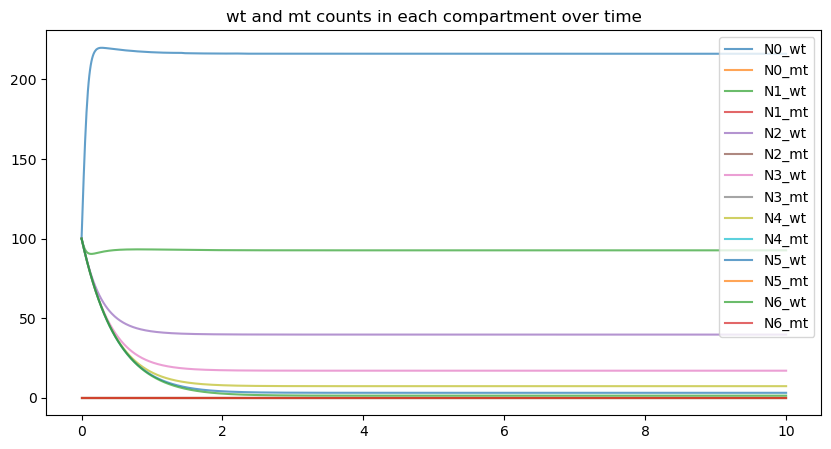

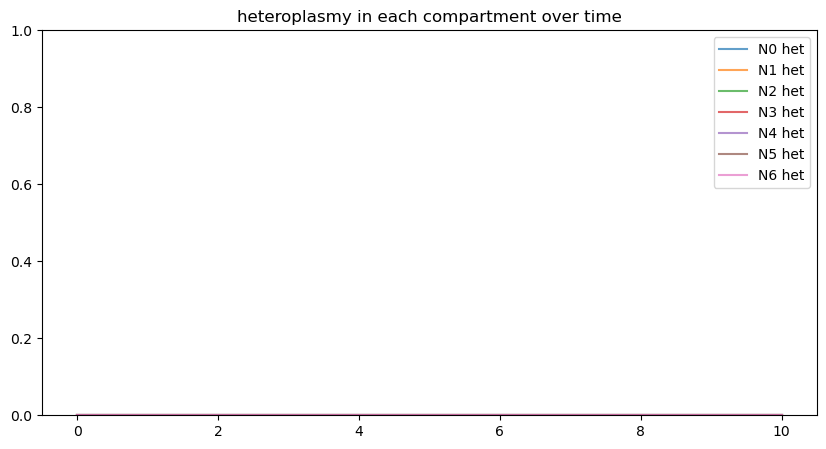

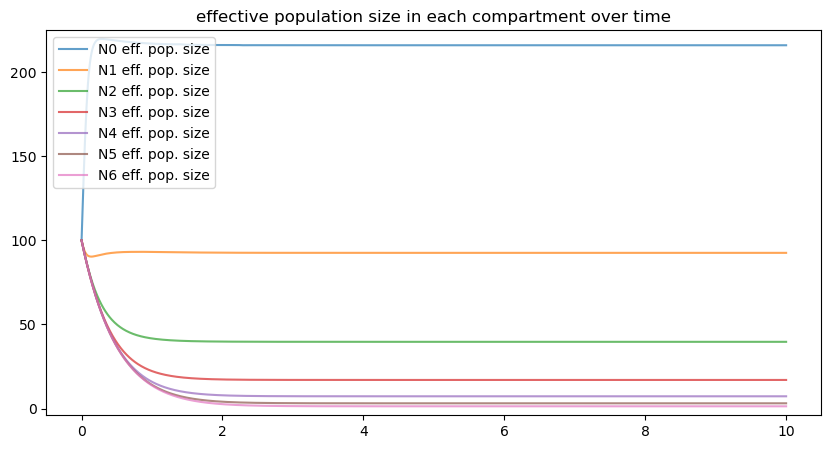

> Final counts of mt and wt in each compartment:
N0_wt	216.0929	
N0_mt	0.0	
N1_wt	92.6113	
N1_mt	0.0	
N2_wt	39.6906	
N2_mt	0.0	
N3_wt	17.0103	
N3_mt	0.0	
N4_wt	7.2901	
N4_mt	0.0	
N5_wt	3.1244	
N5_mt	0.0	
N6_wt	1.3391	
N6_mt	0.0	

> Final effective population sizes in each compartment:
N0	216.0929	
N1	92.6113	
N2	39.6906	
N3	17.0103	
N4	7.2901	
N5	3.1244	
N6	1.3391	
> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
9	7	death	2.0	[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]


/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:94: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


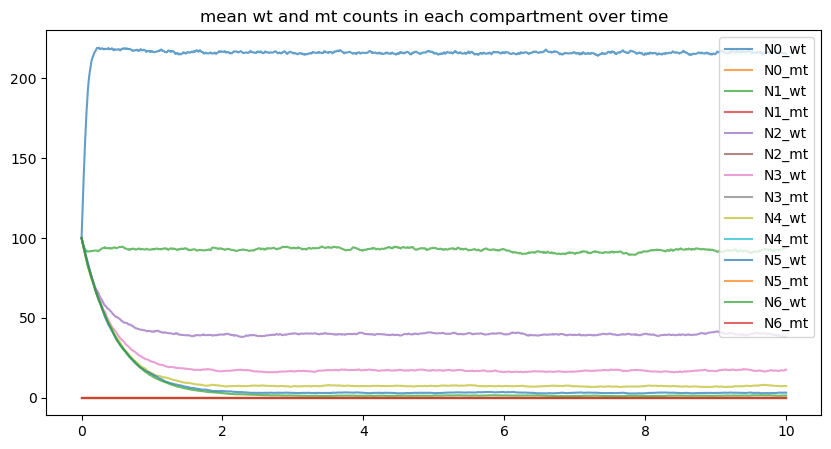

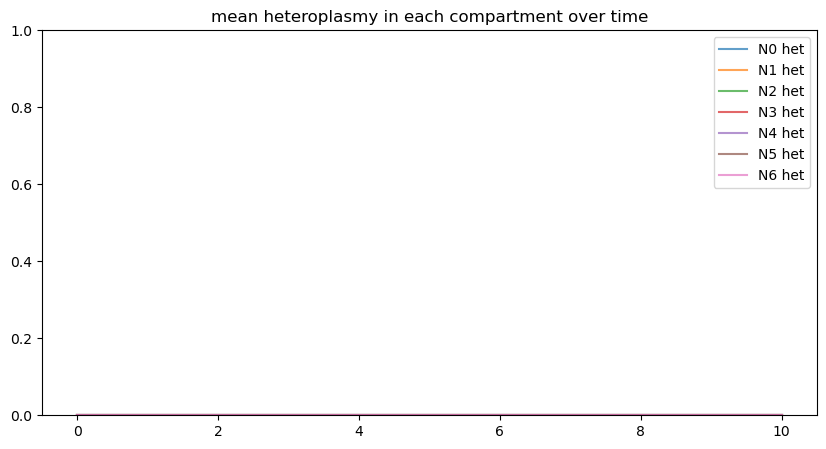

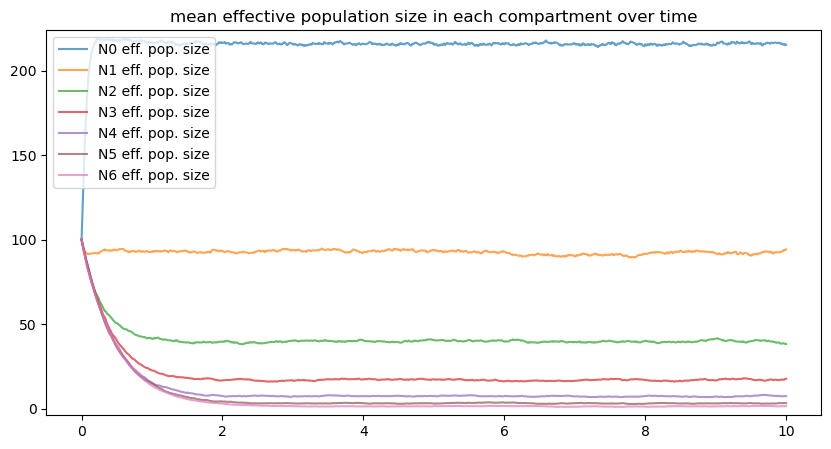

> Final mean counts of mt and wt in each compartment:
N0_wt	215.38	
N0_mt	0.0	
N1_wt	94.2	
N1_mt	0.0	
N2_wt	38.17	
N2_mt	0.0	
N3_wt	17.6	
N3_mt	0.0	
N4_wt	7.36	
N4_mt	0.0	
N5_wt	3.17	
N5_mt	0.0	
N6_wt	1.4	
N6_mt	0.0	

> Final mean heteroplasmy in each compartment:
N0	0.0	
N1	0.0	
N2	0.0	
N3	0.0	
N4	0.0	
N5	0.0	
N6	0.0	

> Final mean effective population sizes in each compartment:
N0	215.38	
N1	94.2	
N2	38.17	
N3	17.6	
N4	7.36	
N5	3.17	
N6	1.4	

> Change in mean heteroplasmy: 
start: 0.0
final: 0.0
delta: 0.0


In [4]:
R_G, R_VARS, R_COMP, R_START_STATE = network_gen_ring(7, [100,0] ,bio_param)
plot_network(R_G)

R_ODE_model = ODE_from_network(R_G)
plot_ODE(ODE_simulate(R_ODE_model, TIME_POINTS, R_START_STATE), TIME_POINTS, DELTA, R_VARS, R_COMP)

R_GILL_PARAM = gillespie_param_from_network(R_G)
plot_gillespie(GILL_simulate(R_GILL_PARAM, TIME_POINTS, R_START_STATE, repl), TIME_POINTS, DELTA, R_VARS, R_COMP)

## Powerlaw tree system

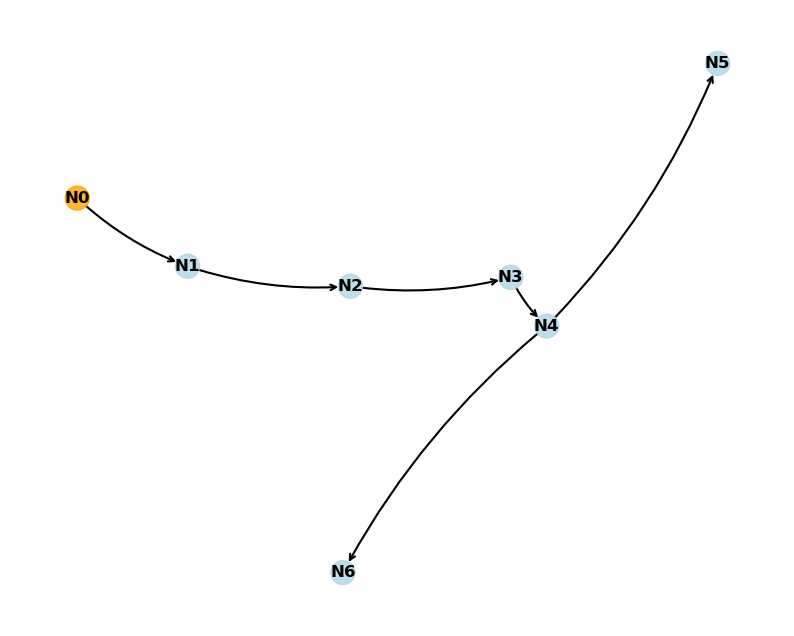

> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5))),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5))),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(1.5)))+(N0_wt*1.5),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(1.5)))+(N0_mt*1.5),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(1.5)))+(N1_wt*1.5),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(1.5)))+(N1_mt*1.5),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(1.5)))+(N2_wt*1.5),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(1.5)))+(N2_mt*1.5),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(3.0)))+(N3_wt*1.5),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(3.0)))+(N3_mt*1.5),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(0.0)))+(N4_wt*1.5),
		# ΔN5_mt/Δt
		(N5_mt*(0-(2.0)-(0.0)))+(N4_mt*1.5),
		# ΔN6_wt/Δt
		(N6_wt*(0-(2.0)-(0.0)))+(N4_wt*1.5),
		# ΔN6_mt/Δt
		(N6_mt*(0-(2.0)-(0.0)))+(N4_mt*1.5),
		]


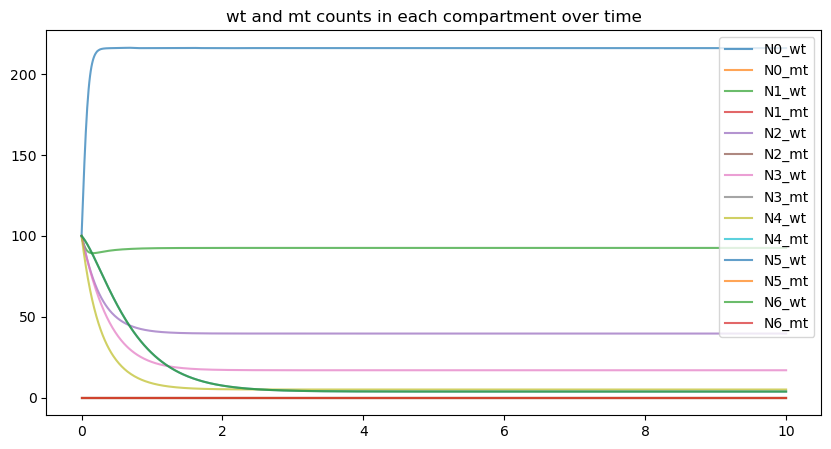

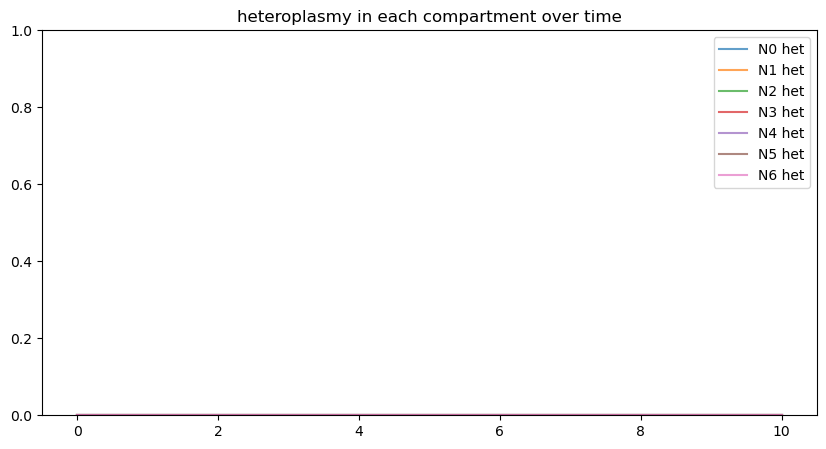

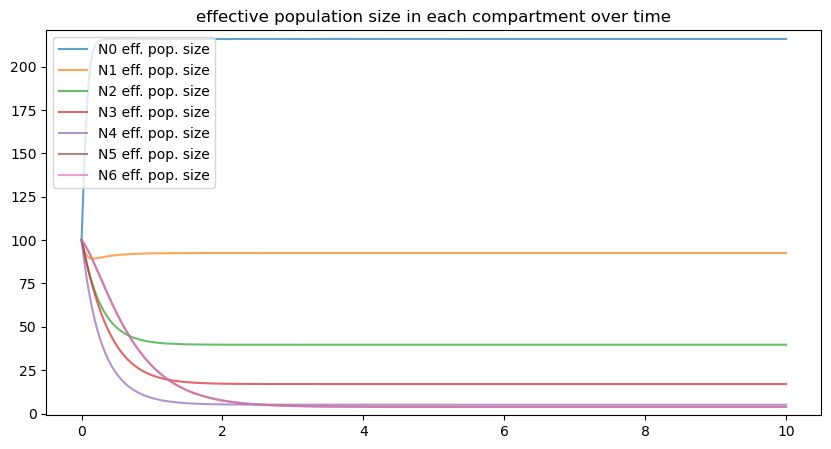

> Final counts of mt and wt in each compartment:
N0_wt	216.0	
N0_mt	0.0	
N1_wt	92.5714	
N1_mt	0.0	
N2_wt	39.6735	
N2_mt	0.0	
N3_wt	17.0029	
N3_mt	0.0	
N4_wt	5.1009	
N4_mt	0.0	
N5_wt	3.8256	
N5_mt	0.0	
N6_wt	3.8256	
N6_mt	0.0	

> Final effective population sizes in each compartment:
N0	216.0	
N1	92.5714	
N2	39.6735	
N3	17.0029	
N4	5.1009	
N5	3.8256	
N6	3.8256	
> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
9	7	death	2.0	[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
10	8	d

/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:94: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


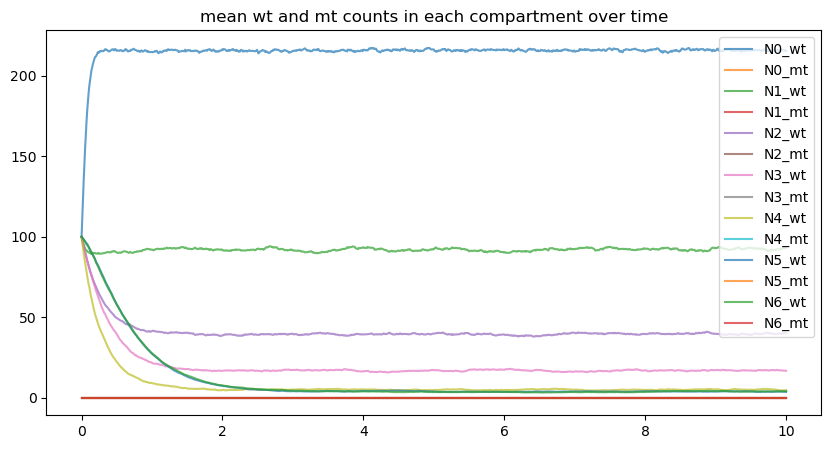

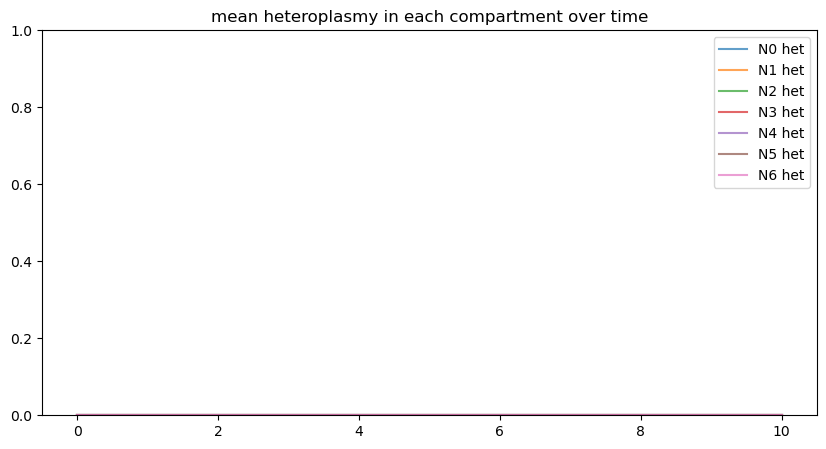

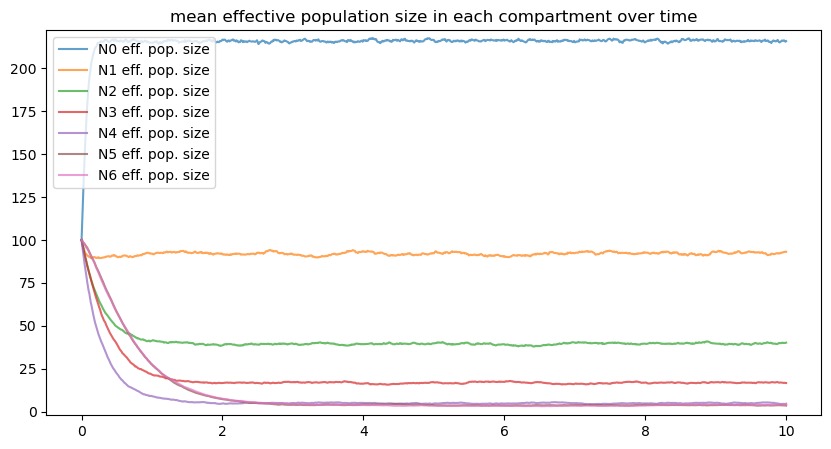

> Final mean counts of mt and wt in each compartment:
N0_wt	215.68	
N0_mt	0.0	
N1_wt	93.13	
N1_mt	0.0	
N2_wt	40.26	
N2_mt	0.0	
N3_wt	16.76	
N3_mt	0.0	
N4_wt	4.72	
N4_mt	0.0	
N5_wt	3.63	
N5_mt	0.0	
N6_wt	4.1	
N6_mt	0.0	

> Final mean heteroplasmy in each compartment:
N0	0.0	
N1	0.0	
N2	0.0	
N3	0.0	
N4	0.0	
N5	0.0	
N6	0.0	

> Final mean effective population sizes in each compartment:
N0	215.68	
N1	93.13	
N2	40.26	
N3	16.76	
N4	4.72	
N5	3.63	
N6	4.1	

> Change in mean heteroplasmy: 
start: 0.0
final: 0.0
delta: 0.0


In [5]:
P_G, P_VARS, P_COMP, P_START_STATE = network_gen_powlaw_tree(7, [100,0] ,bio_param)
plot_network(P_G)

P_ODE_model = ODE_from_network(P_G)
plot_ODE(ODE_simulate(P_ODE_model, TIME_POINTS, P_START_STATE), TIME_POINTS, DELTA, P_VARS, P_COMP)

P_GILL_PARAM = gillespie_param_from_network(P_G)
plot_gillespie(GILL_simulate(P_GILL_PARAM, TIME_POINTS, P_START_STATE, repl), TIME_POINTS, DELTA, P_VARS, P_COMP)